In [1]:
import pandas as pd
import torch
from bert import Bert

In [2]:
df = pd.read_excel("data/Processed Song Dataset.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist         1969 non-null   object 
 1   Lyrics         1969 non-null   object 
 2   Song Title     1969 non-null   object 
 3   Year           1969 non-null   int64  
 4   Popularity     1969 non-null   int64  
 5   en_prob        1969 non-null   float64
 6   cleanedLyrics  1969 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 107.8+ KB


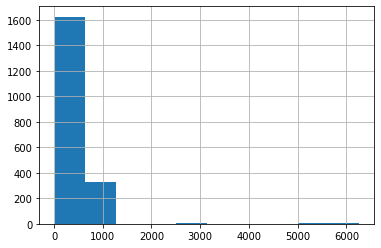

In [3]:
df["Word Count"] = df.Lyrics.apply(lambda l: len(l.split()))
df["Word Count"].hist();

In [4]:
df = df.loc[df["Word Count"] <= 512].reset_index(drop=True)
df.count()

Artist           1379
Lyrics           1379
Song Title       1379
Year             1379
Popularity       1379
en_prob          1379
cleanedLyrics    1379
Word Count       1379
dtype: int64

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [6]:
bert = Bert(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
bert.tokenize(df["Lyrics"].to_list())

array([[ 0.07053304,  0.25672066,  0.4391939 , ..., -0.08117124,
        -0.04159494,  0.13940035],
       [ 0.15911852,  0.13648048,  0.34850895, ..., -0.04814504,
        -0.07906846, -0.17776656],
       [ 0.03878518,  0.1724802 ,  0.54424787, ..., -0.19806495,
        -0.17863883, -0.0288249 ],
       ...,
       [ 0.26192358,  0.24258156,  0.19548526, ..., -0.13490669,
         0.15974265, -0.06197537],
       [-0.27828532,  0.2141993 , -0.05433536, ..., -0.42283663,
        -0.02792796,  0.0850837 ],
       [ 0.08635277,  0.28883934,  0.17500374, ..., -0.35293803,
         0.23242621,  0.0345695 ]])